# Неделя 1. Пятница

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
%matplotlib inline  
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
transactions = pd.read_csv('/home/UBkarima/Загрузки/transactions.csv').drop('Unnamed: 0', axis=1)
users = pd.read_csv('/home/UBkarima/Загрузки/users.csv').drop('Unnamed: 0', axis=1)

In [10]:
transactions = transactions.sort_values('date')
cumulative_data = transactions.groupby(
    ['date', 'group']
).agg({'revenue':'sum', 'transaction_id':'count'}).groupby(level=[1]).cumsum().reset_index()
cumulative_data.rename(columns={'transaction_id': 'transactions'}, inplace=True)

1. Постройте график кумулятивной выручки по группам. Опишите выводы

NameError: name 'cumulative_revenue' is not defined

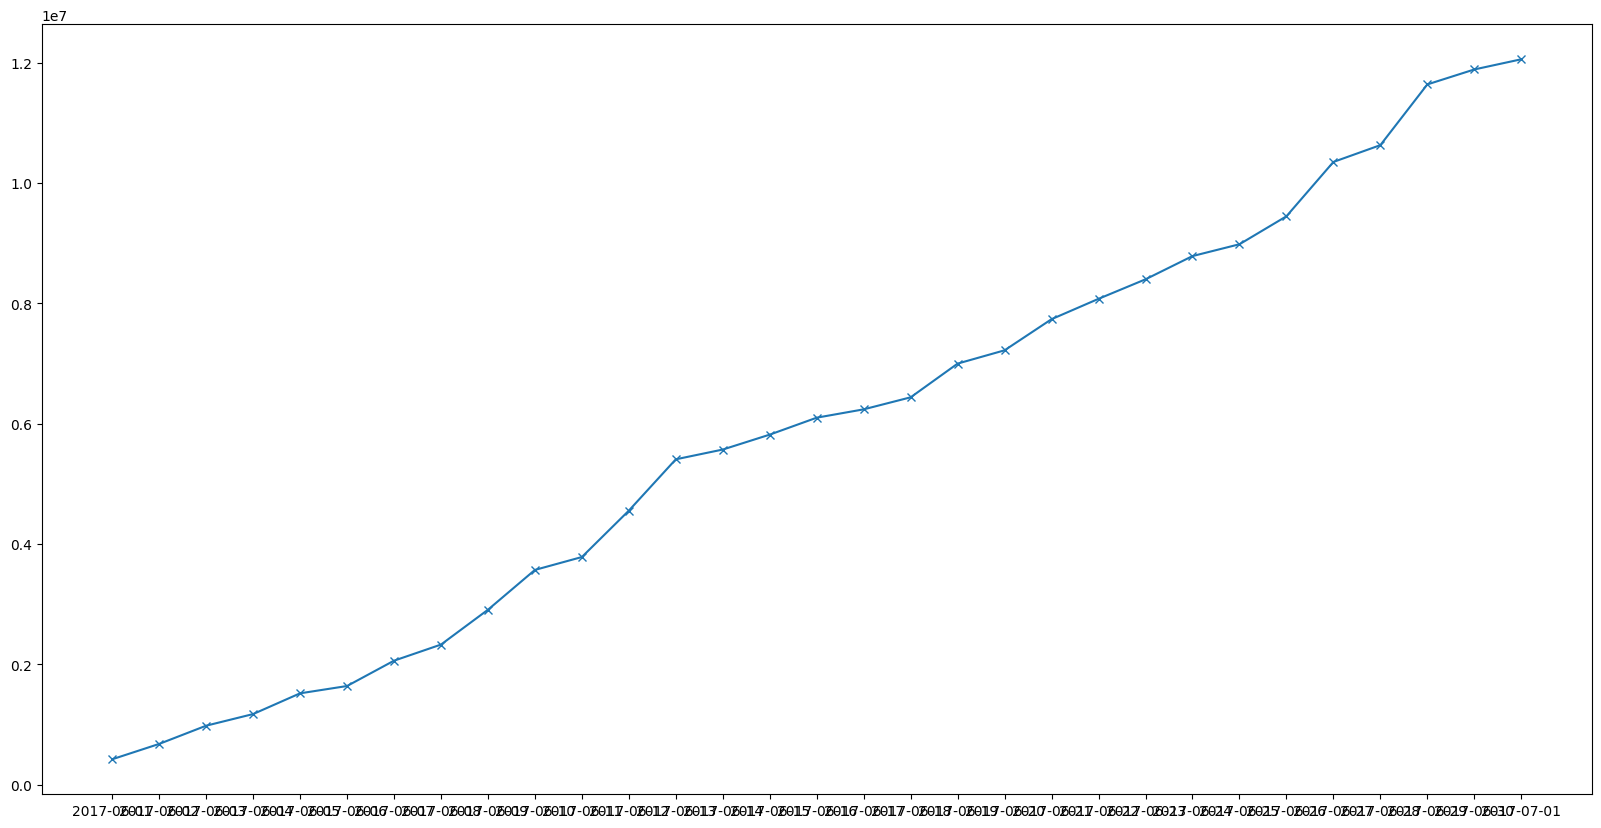

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(
    cumulative_data[cumulative_data['group'] == 'A']['date'], 
    cumulative_data[cumulative_data['group'] == 'A']['revenue'],
    marker='x',
    label='Группа A'
        )
plt.plot(
    cumulative_data[cumulative_revenue['group'] == 'B']['date'], 
    cumulative_data[cumulative_revenue['group'] == 'B']['revenue'], 
    marker='x',
    label='Группа B'
        )
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

2. Постройте график кумулятивного среднего чека по группам. Опишите выводы

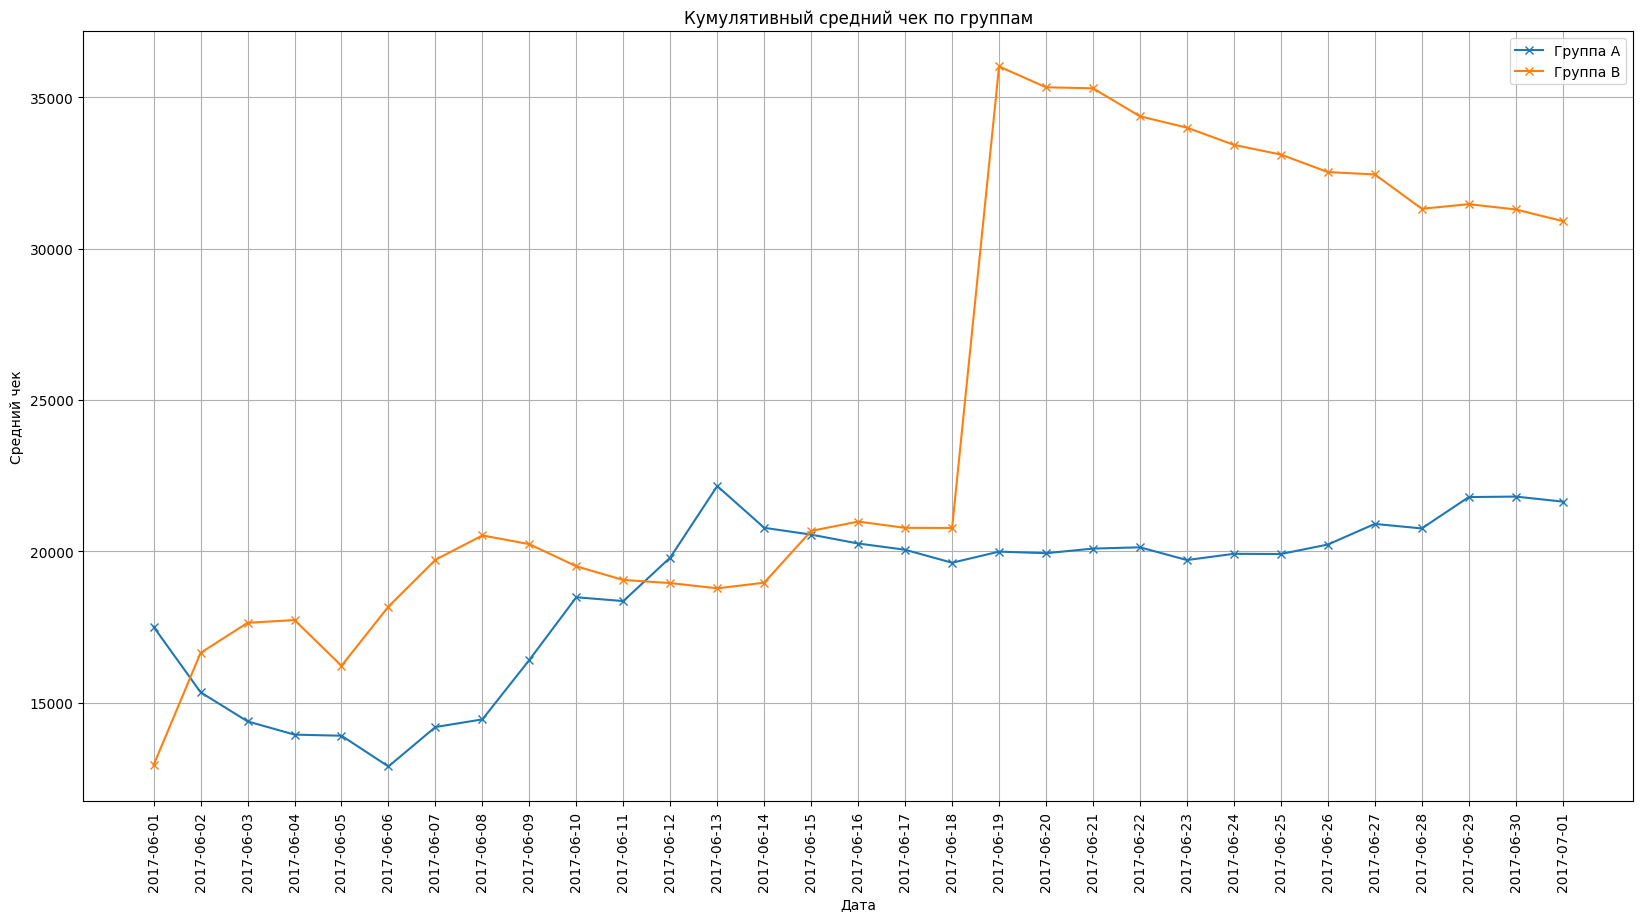

In [12]:
cumulative_data['avg_check'] = cumulative_data['revenue'] / cumulative_data['transactions']
plt.figure(figsize=(20, 10))
plt.plot(cumulative_data[cumulative_data['group'] == 'A']['date'], 
         cumulative_data[cumulative_data['group'] == 'A']['avg_check'],
         marker='x',
         label='Группа A'
        )
plt.plot(cumulative_data[cumulative_data['group'] == 'B']['date'], 
         cumulative_data[cumulative_data['group'] == 'B']['avg_check'], 
         marker='x',
         label='Группа B'
        )
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

3. График относительного изменения кумулятивного среднего чека группы B к группе A. Опишите выводы

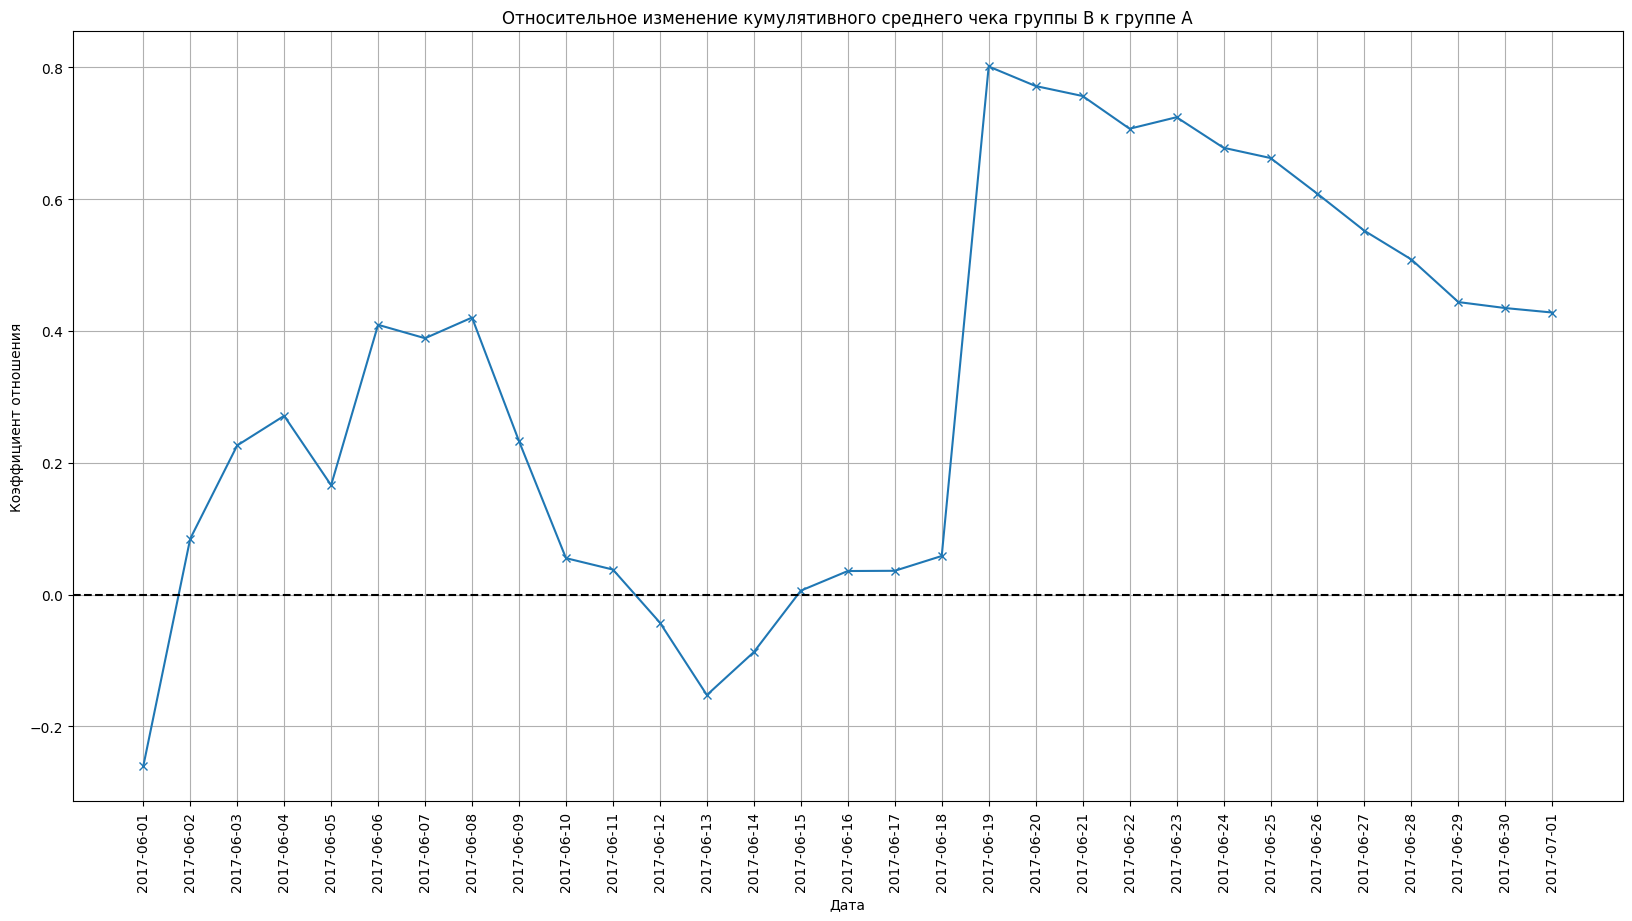

In [13]:
avg_check_by_group = cumulative_data.pivot_table(index='date', columns='group')['avg_check']
plt.figure(figsize=(20, 10))
plt.plot(avg_check_by_group['B'] / avg_check_by_group['A'] - 1, marker='x')
plt.axhline(y=0, color='black', linestyle='--');
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коэффициент отношения')
plt.xticks(rotation=90)
plt.grid()
plt.show()

4. График кумулятивного среднего количества заказов по группам. 

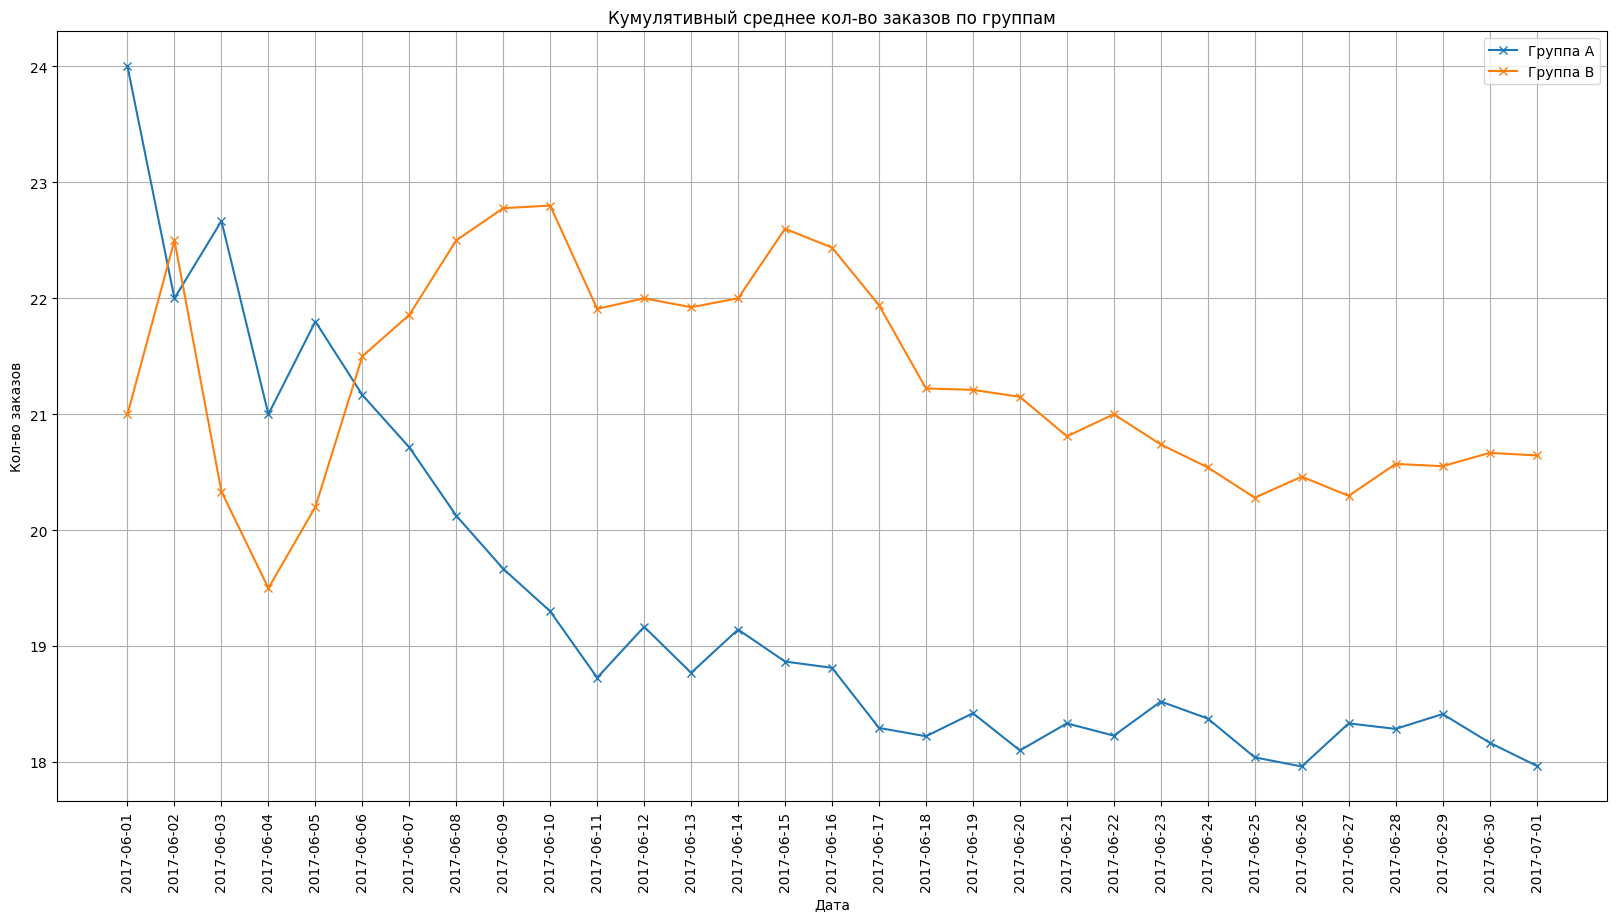

In [14]:
cumulative_transactions = cumulative_data.groupby(['date', 'group'])['transactions'].sum()
cumulative_days = cumulative_data.groupby(['date', 'group']).size().groupby(level=[1]).cumsum()
cumulative_average_transactions = cumulative_transactions / cumulative_days
cumulative_average_transactions = cumulative_average_transactions.reset_index()
cumulative_average_transactions.rename(columns = {0:'average_transactions'}, inplace=True)
plt.figure(figsize=(20, 10))
plt.plot(cumulative_average_transactions[cumulative_average_transactions['group'] == 'A']['date'], 
         cumulative_average_transactions[cumulative_average_transactions['group'] == 'A']['average_transactions'],
         marker='x',
         label='Группа A'
        )
plt.plot(cumulative_average_transactions[cumulative_average_transactions['group'] == 'B']['date'], 
         cumulative_average_transactions[cumulative_average_transactions['group'] == 'B']['average_transactions'], 
         marker='x',
         label='Группа B'
        )
plt.title('Кумулятивный среднее кол-во заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A

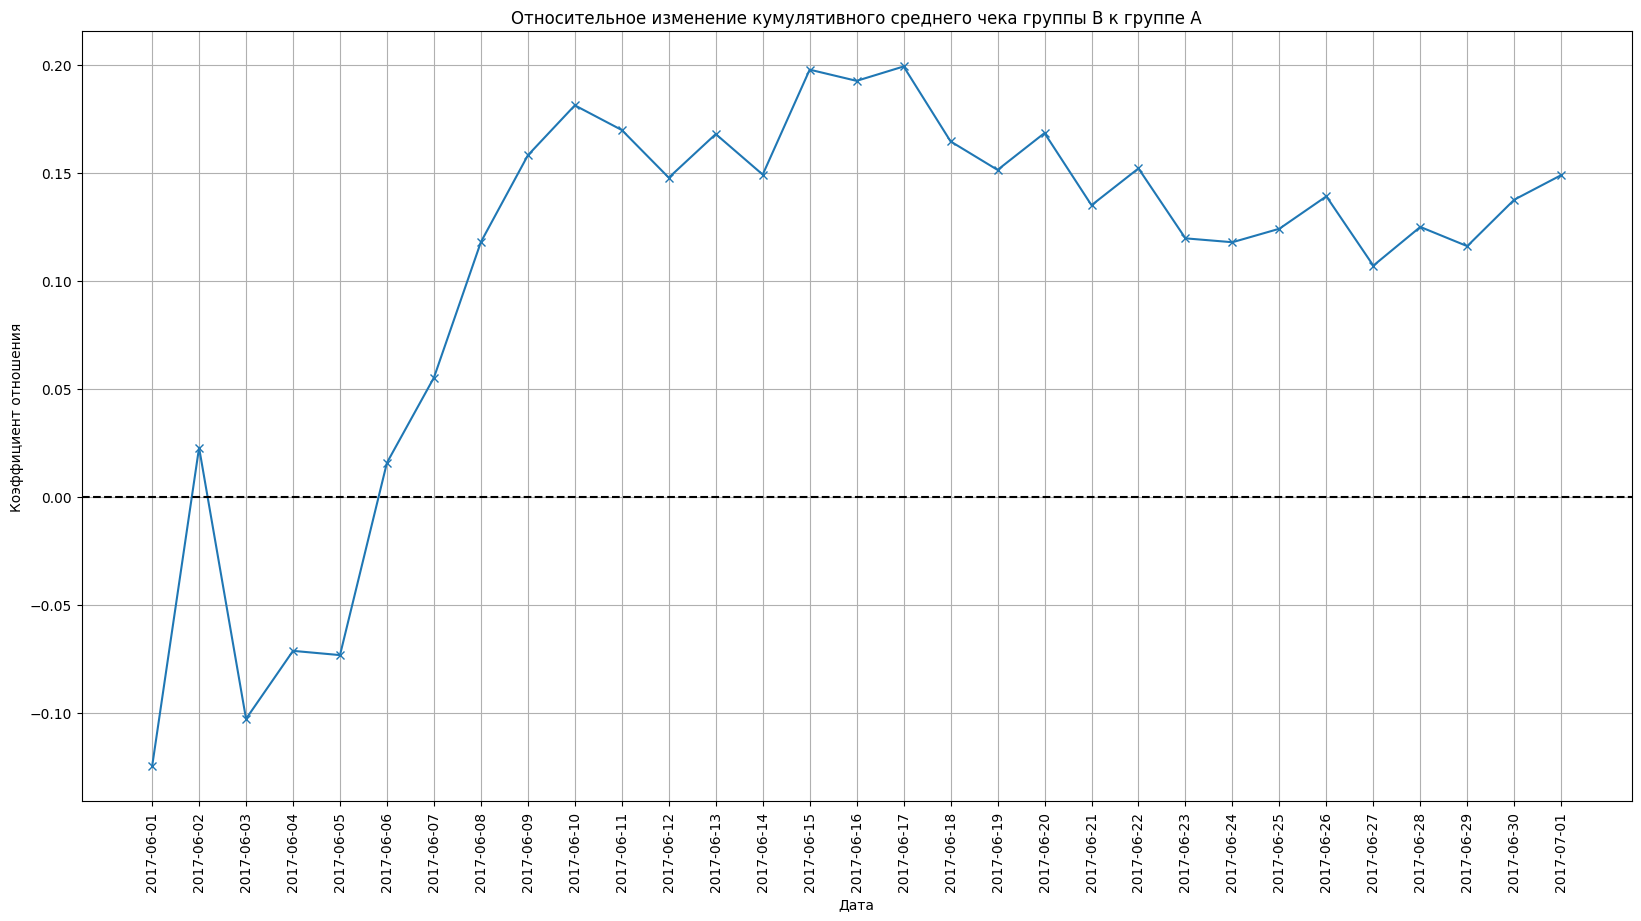

In [15]:
avg_transactions_by_group = cumulative_average_transactions.pivot_table(index='date', columns='group')['average_transactions']
plt.figure(figsize=(20, 10))
plt.plot(avg_transactions_by_group['B'] / avg_transactions_by_group['A'] - 1, marker='x')
plt.axhline(y=0, color='black', linestyle='--');
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коэффициент отношения')
plt.xticks(rotation=90)
plt.grid()
plt.show()

6. Распределение количества заказов по пользователям.  Опишите выводы

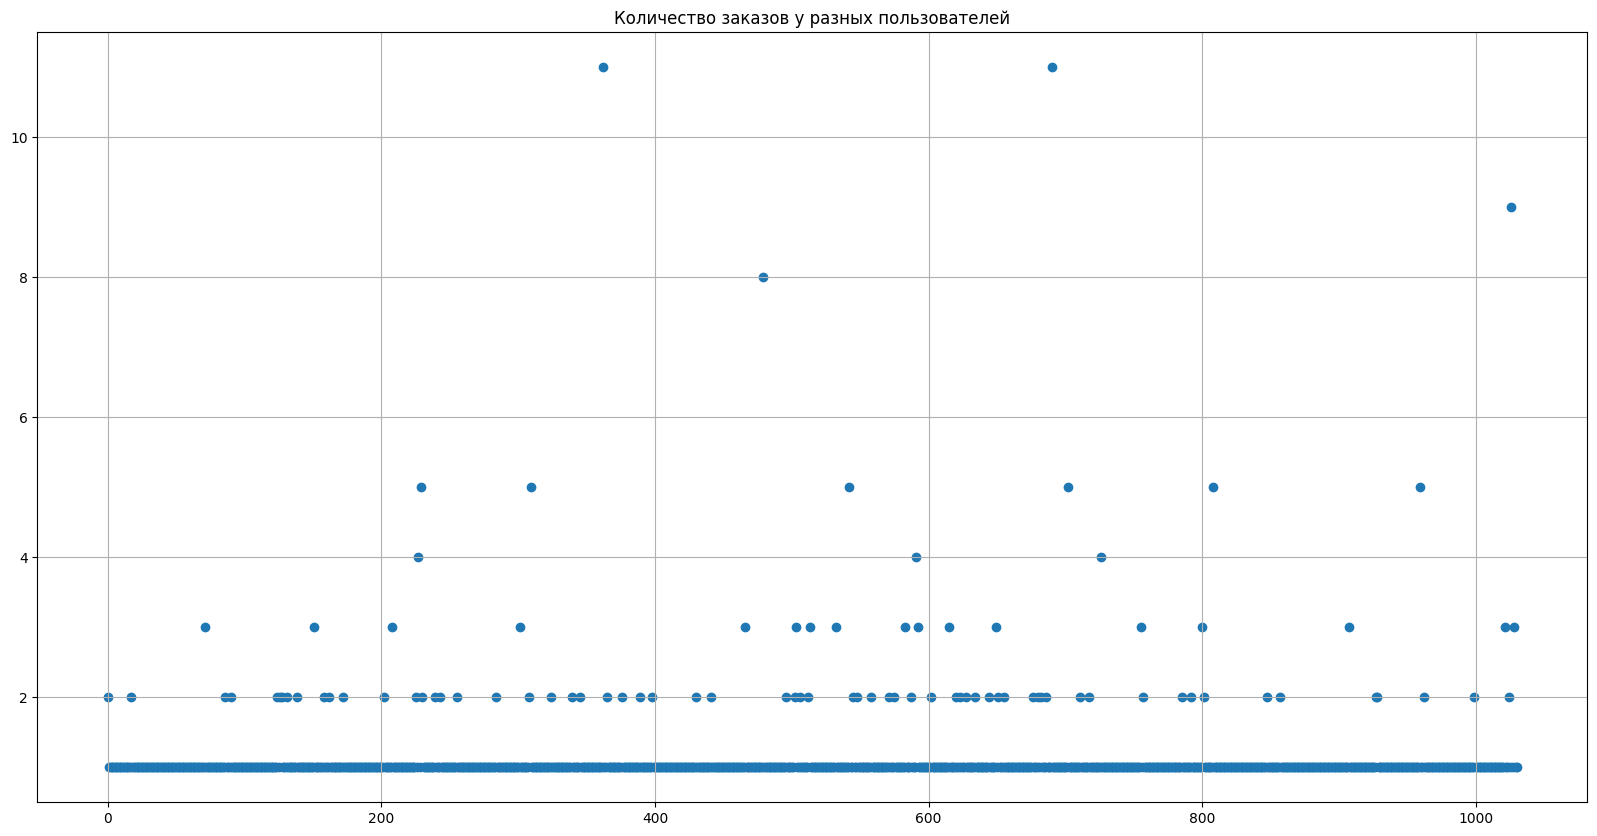

In [16]:
transactions_by_user = transactions.groupby('user_id').agg({'transaction_id': pd.Series.nunique})
plt.figure(figsize=(20, 10))
plt.scatter(x=np.arange(len(transactions_by_user)), y=transactions_by_user)
plt.title('Количество заказов у разных пользователей')
plt.grid()
plt.show()

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте распределение стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:   
*  Остановить тест, зафиксировать победу одной из групп.  
*  Остановить тест, зафиксировать отсутствие различий между группами.  
*  Продолжить тест.